In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl

exchange='WIKI'
ticker='AMZN'

df = quandl.get('%s/%s' % (exchange, ticker),api_key='xCpdYQzqjxgooYJ7zisz')
stock=df.copy()
data=df.copy()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: 
.resample() is now a deferred operation
You called reset_index(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: 
.resample() is now a deferred operation
You called reset_index(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  # Remove the CWD from sys.path while we load stuff.


predicted=571.736888, expected=582.950000
predicted=584.935710, expected=582.180000
predicted=583.229403, expected=581.410000
predicted=581.138152, expected=580.640000
predicted=578.937810, expected=579.870000
predicted=578.451915, expected=593.860000
predicted=592.745527, expected=598.690000
predicted=599.322149, expected=593.640000
predicted=594.062075, expected=598.500000
predicted=598.602455, expected=596.730000
predicted=598.088480, expected=594.960000
predicted=596.482152, expected=593.190000
predicted=594.539344, expected=586.140000
predicted=586.485055, expected=602.080000
predicted=601.731947, expected=591.430000
predicted=591.741917, expected=594.600000
predicted=593.025888, expected=595.043333
predicted=593.625673, expected=595.486667
predicted=594.717686, expected=595.930000
predicted=597.384963, expected=603.170000
predicted=603.327984, expected=614.820000
predicted=614.350603, expected=620.750000
predicted=621.662371, expected=625.890000
predicted=626.166615, expected=629

predicted=795.179705, expected=795.900000
predicted=794.440387, expected=799.020000
predicted=798.625229, expected=813.640000
predicted=814.058106, expected=817.140000
predicted=818.618723, expected=815.285000
predicted=815.656350, expected=813.430000
predicted=814.771212, expected=811.575000
predicted=811.822147, expected=809.720000
predicted=809.936906, expected=807.480000
predicted=809.371489, expected=809.040000
predicted=809.483241, expected=808.330000
predicted=806.481499, expected=811.513333
predicted=808.945875, expected=814.696667
predicted=813.360516, expected=817.880000
predicted=817.498399, expected=822.440000
predicted=823.774965, expected=836.520000
predicted=837.142866, expected=839.150000
predicted=838.827374, expected=835.770000
predicted=836.433327, expected=833.973333
predicted=833.770109, expected=832.176667
predicted=830.830661, expected=830.380000
predicted=829.987436, expected=823.480000
predicted=824.712173, expected=832.350000
predicted=832.091016, expected=839

predicted=1161.997533, expected=1176.750000
predicted=1173.084913, expected=1162.350000
predicted=1163.751963, expected=1152.883333
predicted=1152.429220, expected=1143.416667
predicted=1145.097377, expected=1133.950000
predicted=1134.320173, expected=1141.570000
predicted=1141.723285, expected=1152.350000
predicted=1153.705507, expected=1159.790000
predicted=1160.786749, expected=1162.000000
predicted=1160.578626, expected=1164.306667
predicted=1161.058442, expected=1166.613333
predicted=1164.944974, expected=1168.920000
predicted=1166.331365, expected=1165.080000
predicted=1163.147535, expected=1164.130000
predicted=1166.254239, expected=1174.260000
predicted=1172.534288, expected=1179.140000
predicted=1182.224665, expected=1182.953333
predicted=1185.329791, expected=1186.766667
predicted=1188.173140, expected=1190.580000
predicted=1191.550394, expected=1187.380000
predicted=1190.651919, expected=1177.620000
predicted=1177.262670, expected=1174.760000
predicted=1172.029350, expected=

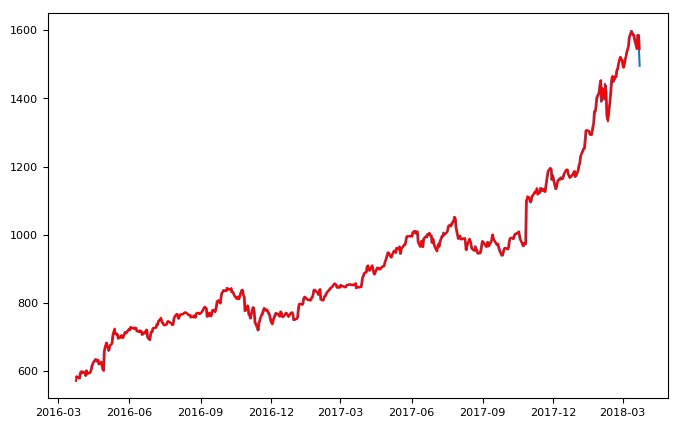

Date
2016-03-24     571.736888
2016-03-25     584.935710
2016-03-26     583.229403
2016-03-27     581.138152
2016-03-28     578.937810
2016-03-29     578.451915
2016-03-30     592.745527
2016-03-31     599.322149
2016-04-01     594.062075
2016-04-02     598.602455
2016-04-03     598.088480
2016-04-04     596.482152
2016-04-05     594.539344
2016-04-06     586.485055
2016-04-07     601.731947
2016-04-08     591.741917
2016-04-09     593.025888
2016-04-10     593.625673
2016-04-11     594.717686
2016-04-12     597.384963
2016-04-13     603.327984
2016-04-14     614.350603
2016-04-15     621.662371
2016-04-16     626.166615
2016-04-17     629.610531
2016-04-18     631.680298
2016-04-19     635.083806
2016-04-20     629.190528
2016-04-21     632.323496
2016-04-22     632.424434
                 ...     
2018-02-22    1485.801799
2018-02-23    1485.998292
2018-02-24    1499.641194
2018-02-25    1514.716923
2018-02-26    1521.032580
2018-02-27    1519.635499
2018-02-28    1508.944514
2018-03

In [262]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
def autoregression(train,test):
    train = train.resample('D')
    train = train.reset_index(level=0)
    train = train.interpolate()
    train.index=train['Date']
    train1=train['Adj. Close']
    test1= test.resample('D')
    test1 = test1.reset_index(level=0)
    test1 = test1.interpolate()
    test1.index=test1['Date']
    test=test1['Adj. Close']
    #print train1
    model = AR(train1)
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
    # walk forward over time steps in test
    history = train1[len(train1)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    predictions=pd.Series(predictions,index=test.index)
    # plot
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.show()
    return predictions

max_date=max(data.index)
end_date=max_date-pd.DateOffset(years=2)
start_date=end_date-pd.DateOffset(years=5)
train=data[(data.index>start_date)&(data.index<=end_date)]['Adj. Close']
test=data[(data.index>end_date)]['Adj. Close']

pred_auto1=autoregression(train,test)
print pred_auto1
print end_date

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:169: FutureWarning: 
.resample() is now a deferred operation
You called reset_index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:175: FutureWarning: 
.resample() is now a deferred operation
You called reset_index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead


2016-03-23 00:00:00
Date
2011-03-23    165.320000
2011-03-24    171.100000
2011-03-25    170.980000
2011-03-26    170.436667
2011-03-27    169.893333
Name: Adj. Close, dtype: float64
2016-03-25    1.0
2016-03-26    1.0
2016-03-27    1.0
2016-03-28    0.0
2016-03-29    1.0
dtype: float64

-----------------------------------------------------------------------
SVM - RBF Kernel with Features : 
Open Change%, Close Change%, High Change%, Low Change%, Volume Change%
Open Difference% , Volume Difference%, Open Price Moving Avg
Close Price Moving Avg, High Price Moving Avg, Low Price Moving Avg
Accuracy:  76.92307692307693 %
Precision Score : 76.7379679144385 %
Recall Score : 77.98913043478261 %
-----------------------------------------------------------------------


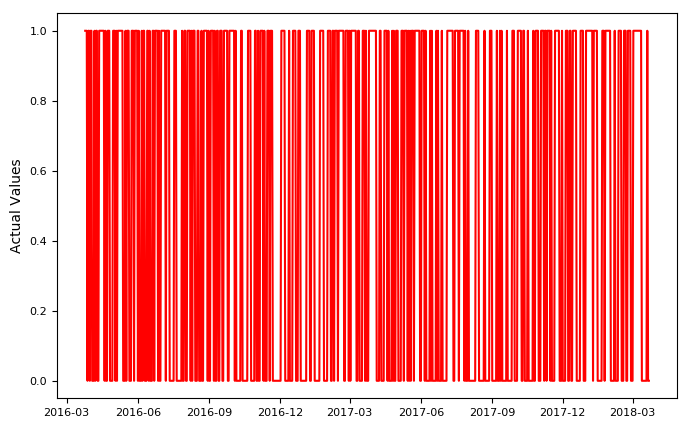

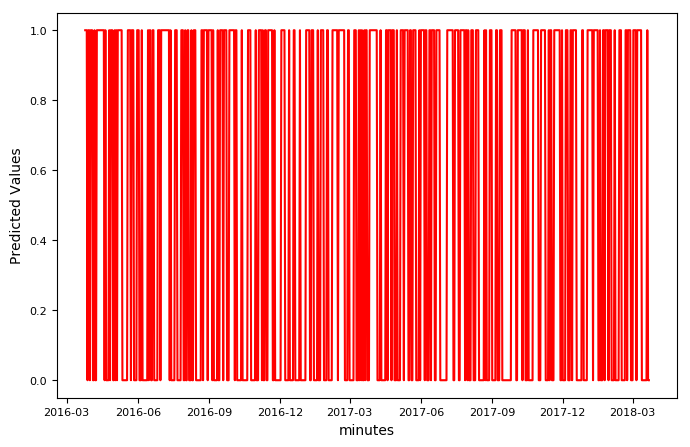


-----------------------------------------------------------------------
Open Change%, Close Change%, High Change%, Low Change%, Volume Change%
Open Difference% , Volume Difference%, Open Price Moving Avg
Close Price Moving Avg, High Price Moving Avg, Low Price Moving Avg
Accuracy: 69.64285714285714 %
-----------------------------------------------------------------------


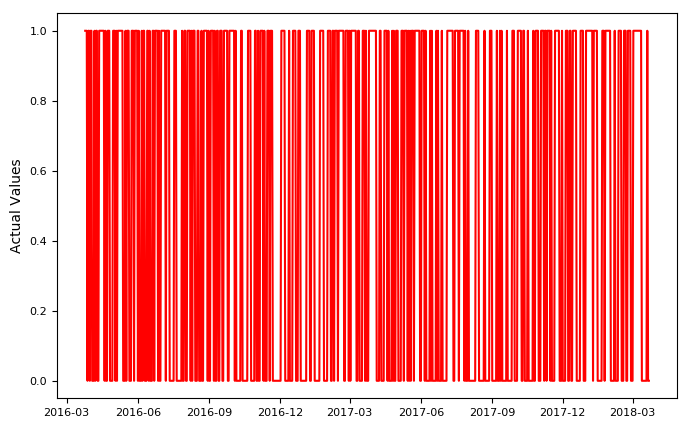

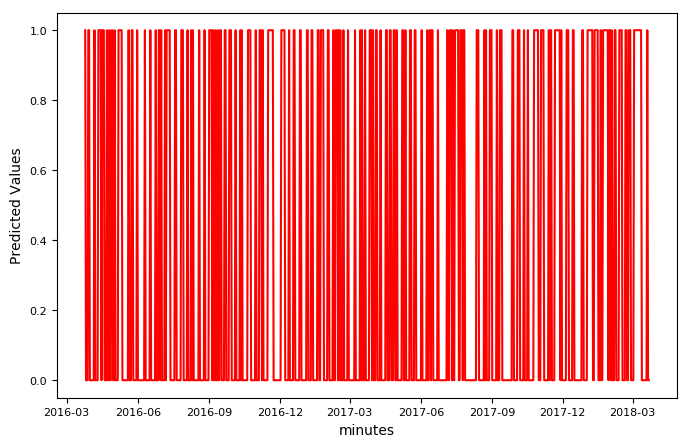

In [263]:
import urllib2 
import csv
import numpy as np
from sklearn import svm 
from sklearn.metrics import *
import matplotlib.pyplot as plt
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure import *
from pybrain.datasets import *
from pybrain.structure.modules import *
def svm_rbf(train_feature, train_label,test_feature,test_label):
    clf = svm.SVC(C=100000,kernel='rbf')
    clf.fit(train_feature, train_label)
    predicted = clf.predict(test_feature)
    print "Accuracy: ", accuracy_score(predicted, test_label)*100, "%"
    print "Precision Score :", precision_score(predicted, test_label)*100, "%"
    print "Recall Score :" ,recall_score(predicted, test_label)*100, "%"
    return pd.Series(predicted,index=test_label.index.values)


def  plotting_svm(predicted, test_labels,clr):
    plt.ylabel('Actual Values')
    plt.plot( test_labels,color=clr)
    plt.show()
    plt.xlabel('minutes')
    plt.ylabel('Predicted Values')
    plt.plot( predicted,color=clr)
    
    plt.show()


def neural_networks(train_feature, train_label, test_features, test_labels):
    net = buildNetwork(len(train_feature[0]), 30, 1, hiddenclass = TanhLayer, outclass = TanhLayer,recurrent = True)
    ds = ClassificationDataSet(len(train_feature[0]), 1)
    for i, j in zip(train_feature, train_label):
        ds.addSample(i, j)
    trainer = BackpropTrainer(net, ds)
    epochs = 13
    for i in range(epochs):
        trainer.train()
    predicted = list()
    for i in test_features:
        predicted.append(int(net.activate(i)>0.5))
    predicted = pd.Series(predicted,index=test_labels.index.values)

    print "Accuracy:", accuracy_score(test_labels, predicted)*100, "%"
    return predicted

def creating_binary_labels(close_list, open_price_list):
    label_list = close_list - open_price_list
    label_list = label_list[1:-1]

    for i in range(len(label_list)):
        if(label_list[i]>0):
            label_list[i]=1
        else:
            label_list[i]=0
    return label_list


def fearure_creation(data):
    #Initialising
    timestamp_list=data.index.values
    close_list=data['Adj. Close']
    high_list=data['Adj. High']
    low_list=data['Adj. Low']
    open_price_list=data['Adj. Open']
    volume_list=data['Adj. Volume']
    split_ratio=data['Split Ratio']
    open_change_percentage_list=[]
    close_change_percentage_list=[]
    low_change_percentage_list=[]
    high_change_percentage_list=[]
    volume_change_percentage_list=[]    
    volume_diff_percentage_list=[]
    open_diff_percentage_list=[]
    Open_price_moving_average_list=[]
    Close_price_moving_average_list=[]
    High_price_moving_average_list=[]
    Low_price_moving_average_list=[]


    highest_open_price = open_price_list[0]
    lowest_open_price = open_price_list[0]
    highest_volume = volume_list[0]
    lowest_volume = volume_list[0]
    #if(x>len(open_price_list)):
    x = len(open_price_list)
    for i in range(len(close_list)-x,len(close_list)):
        if(highest_open_price<open_price_list[i]):
            highest_open_price=open_price_list[i]
        if(lowest_open_price>open_price_list[i]):
            lowest_open_price=open_price_list[i]
        if(highest_volume<volume_list[i]):
            highest_volume=volume_list[i]
        if(lowest_volume>volume_list[i]):
            lowest_volume=volume_list[i]


    #Finding change percentage list/difference list
    opensum=open_price_list[0]
    closesum=close_list[0]
    highsum=high_list[0]
    lowsum=low_list[0]
    for i in range(1, len(close_list)-1):
        close_change_percentage = (close_list[i] - close_list[i-1])/close_list[i-1]
        close_change_percentage_list.append(close_change_percentage)
        
        open_change_percentage = (open_price_list[i+1] - open_price_list[i])/open_price_list[i]
        open_change_percentage_list.append(open_change_percentage)

        high_change_percentage = (high_list[i] - high_list[i-1])/high_list[i-1]
        high_change_percentage_list.append(high_change_percentage)
        if volume_list[i-1]==0:
            volume_list[i-1] = volume_list[i-2]

        volume_change_percentage = (volume_list[i] - volume_list[i-1])/volume_list[i-1]
        volume_change_percentage_list.append(volume_change_percentage)

        low_change_percentage = (low_list[i] - low_list[i-1])/low_list[i-1]
        low_change_percentage_list.append(low_change_percentage)


        volume_diff = (volume_list[i] - volume_list[i-1])/(highest_volume-lowest_volume)
        volume_diff_percentage_list.append( volume_diff)

        open_diff = (open_price_list[i+1] - open_price_list[i])/(highest_open_price - lowest_open_price)
        open_diff_percentage_list.append(open_diff)

        opensum+=open_price_list[i]
        closesum+=close_list[i]
        highsum+=high_list[i]
        lowsum+=low_list[i]

        Open_price_moving_average = float(opensum/i+1) / open_price_list[i+1]
        Open_price_moving_average_list.append(Open_price_moving_average)

        High_price_moving_average = float(highsum/i+1) / high_list[i+1]
        High_price_moving_average_list.append(High_price_moving_average)

        Close_price_moving_average = float(closesum/i+1) / close_list[i+1]
        Close_price_moving_average_list.append(Close_price_moving_average)

        Low_price_moving_average = float(lowsum/i+1) / low_list[i+1]
        Low_price_moving_average_list.append(Low_price_moving_average)

            
    
    #Combining features
    close_change_percentage_list = np.array(close_change_percentage_list)
    high_change_percentage_list = np.array(high_change_percentage_list)
    low_change_percentage_list = np.array(low_change_percentage_list)
    volume_change_percentage_list = np.array(volume_change_percentage_list)
    open_price_list = np.array(open_price_list)
    close_list = np.array(close_list)
    open_diff_percentage_list=np.array(open_diff_percentage_list)
    volume_change_percentage_list=np.array(volume_change_percentage_list)
    split_ratio=np.array(split_ratio[1:-1])
    feature4 = np.column_stack((split_ratio,open_change_percentage_list, high_change_percentage_list, low_change_percentage_list, volume_change_percentage_list))  
    #feature4 = np.column_stack((split_ratio,open_change_percentage_list, close_change_percentage_list, high_change_percentage_list, low_change_percentage_list, volume_change_percentage_list, open_diff_percentage_list, volume_diff_percentage_list,Open_price_moving_average_list, Close_price_moving_average_list, High_price_moving_average_list, Low_price_moving_average_list))
    label_list = creating_binary_labels(close_list,open_price_list)
    #feature4=pd.DataFrame(split_ratio,open_change_percentage_list, close_change_percentage_list, high_change_percentage_list, low_change_percentage_list, volume_change_percentage_list, open_diff_percentage_list, volume_diff_percentage_list,Open_price_moving_average_list, Close_price_moving_average_list, High_price_moving_average_list, Low_price_moving_average_list,index=timestamp_list[1:-1])
    label_list=pd.Series(label_list,index=timestamp_list[1:-1])
    return feature4, label_list
train=data[(data.index>=start_date)&(data.index<=end_date)]
test=data[(data.index>end_date)]
train = train.resample('D')
train = train.reset_index(level=0)
train = train.interpolate()
train.index=train['Date']
train1=train
train=train1.copy()
test1= test.resample('D')
test1 = test1.reset_index(level=0)
test1 = test1.interpolate()
test1.index=test1['Date']
test=test1

train_feature, train_label = fearure_creation(train)
test_feature,test_label=fearure_creation(test)
print end_date
print train['Adj. Close'].head()
print test_label.head()
print
print "-----------------------------------------------------------------------"
print "SVM - RBF Kernel with Features : "
print "Open Change%, Close Change%, High Change%, Low Change%, Volume Change%"
print "Open Difference% , Volume Difference%, Open Price Moving Avg"
print "Close Price Moving Avg, High Price Moving Avg, Low Price Moving Avg"
pred_svm =  svm_rbf(train_feature, train_label,test_feature,test_label)
print "-----------------------------------------------------------------------"

plotting_svm(pred_svm, test_label,'r')

print
print "-----------------------------------------------------------------------"
#print "SVM - RBF Kernel with Features : "
print "Open Change%, Close Change%, High Change%, Low Change%, Volume Change%"
print "Open Difference% , Volume Difference%, Open Price Moving Avg"
print "Close Price Moving Avg, High Price Moving Avg, Low Price Moving Avg"
pred_NN=neural_networks(train_feature, train_label, test_feature, test_label)
print "-----------------------------------------------------------------------"

plotting_svm(pred_NN, test_label,'r')


In [264]:
stock=df.copy()

In [265]:
from stocker import Stocker

amazon = Stocker('AMZN',stock)

AMZN Stocker Initialized. Data covers 1997-05-16 to 2018-03-23.


Maximum Adj. Close = 1598.39 on 2018-03-12.
Minimum Adj. Close = 1.40 on 1997-05-22.
Current Adj. Close = 1495.56 on 2018-03-23.



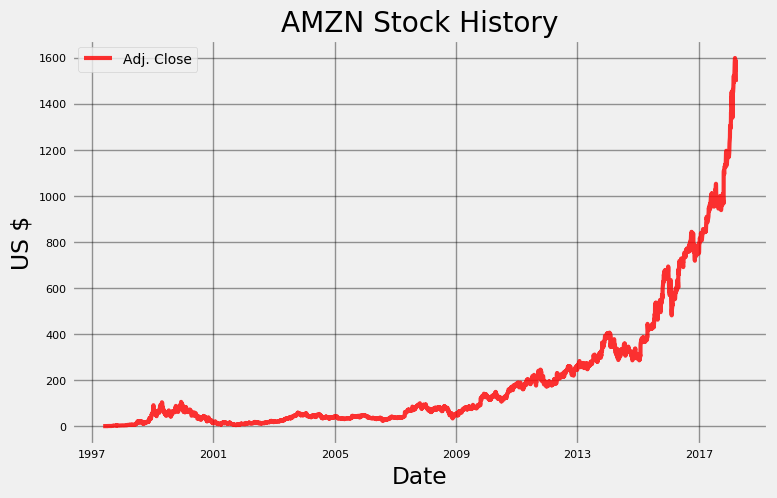

In [266]:
amazon.plot_stock()

Predicted Price on 2018-03-22 = $1067.00


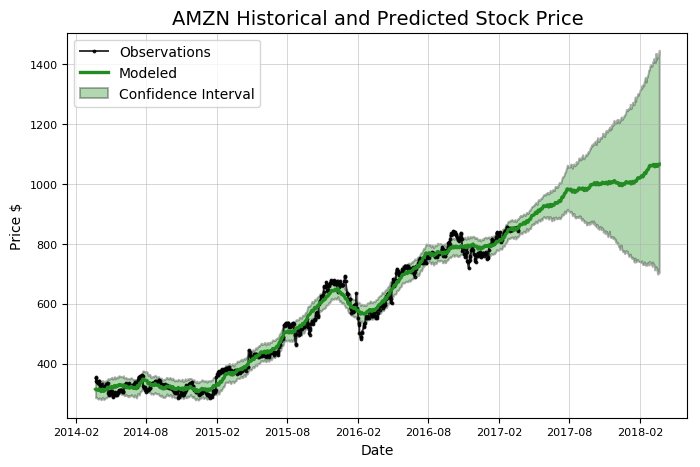

             ds        trend  trend_lower  trend_upper  yhat_lower  \
0    2014-03-24   323.415784   323.415784   323.415784  286.834044   
1    2014-03-25   323.247702   323.247702   323.247702  288.762157   
2    2014-03-26   323.079619   323.079619   323.079619  286.005650   
3    2014-03-27   322.911537   322.911537   322.911537  287.150045   
4    2014-03-28   322.743455   322.743455   322.743455  285.736587   
5    2014-03-31   322.239208   322.239208   322.239208  281.349229   
6    2014-04-01   322.071125   322.071125   322.071125  283.338608   
7    2014-04-02   321.903043   321.903043   321.903043  284.363031   
8    2014-04-03   321.734961   321.734961   321.734961  285.969111   
9    2014-04-04   321.566878   321.566878   321.566878  285.589912   
10   2014-04-07   321.062631   321.062631   321.062631  279.439191   
11   2014-04-08   320.894549   320.894549   320.894549  280.325813   
12   2014-04-09   320.726467   320.726467   320.726467  282.389198   
13   2014-04-10   32

In [267]:
model, pred_add1 = amazon.create_prophet_model(days=365)
print pred_add1

In [268]:
pred_auto=pred_auto1.copy()
for i in range(1, len(pred_auto1)):
    if(pred_auto1[i]-pred_auto1[i-1]>0):
        pred_auto[i]=1
    else:
        pred_auto[i]=0
pred_add1.index=pred_add1['ds']
pred_add2=pred_add1['yhat']
pred_add=pred_add2.copy()
for i in range(1, len(pred_add2)):
    if(pred_add2[i]-pred_add2[i-1]>0):
        pred_add[i]=1
    else:
        pred_add[i]=0
t=df['Adj. Close']
t=t[t.index>=(end_date-pd.DateOffset(years=3))]
t1=t.copy()
for i in range(1, len(t)):
    if(t[i]-t[i-1]>0):
        t1[i]=1
    else:
        t1[i]=0
t1=t1[t1.index>(end_date-pd.DateOffset(years=3))]
t2 = t1.resample('D')
t2 = t2.reset_index(level=0)
t2 = t2.interpolate()
t2.index=t2['Date']
t1=t2['Adj. Close']

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: 
.resample() is now a deferred operation
You called reset_index(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead


In [269]:
print t1
#print pred_add
#print pred_auto
#print pred_svm
#print pred_NN

Date
2013-03-25    256.020000
2013-03-26      1.000000
2013-03-27      1.000000
2013-03-28      1.000000
2013-03-29      0.750000
2013-03-30      0.500000
2013-03-31      0.250000
2013-04-01      0.000000
2013-04-02      1.000000
2013-04-03      0.000000
2013-04-04      1.000000
2013-04-05      0.000000
2013-04-06      0.333333
2013-04-07      0.666667
2013-04-08      1.000000
2013-04-09      1.000000
2013-04-10      1.000000
2013-04-11      1.000000
2013-04-12      1.000000
2013-04-13      0.666667
2013-04-14      0.333333
2013-04-15      0.000000
2013-04-16      1.000000
2013-04-17      0.000000
2013-04-18      0.000000
2013-04-19      1.000000
2013-04-20      1.000000
2013-04-21      1.000000
2013-04-22      1.000000
2013-04-23      1.000000
                 ...    
2018-02-22      1.000000
2018-02-23      1.000000
2018-02-24      1.000000
2018-02-25      1.000000
2018-02-26      1.000000
2018-02-27      0.000000
2018-02-28      1.000000
2018-03-01      0.000000
2018-03-02      1.00

In [275]:
ens=pd.DataFrame()
ens['pred_add']=pred_add
ens['pred_auto']=pred_auto
ens['pred_svm']=pred_svm
ens['pred_NN']=pred_NN
ens=ens.dropna()


max_date=max(ens.index)
end_date=max_date-pd.DateOffset(years=1)
ens_y=pd.Series(t1,index=ens.index.values)
ens_y=ens_y.dropna()
train=ens[(ens.index<=end_date)]
test=ens[(ens.index>end_date)]
train_label=ens_y[(ens_y.index<=end_date)]
test_label=ens_y[(ens_y.index>end_date)]
print accuracy_score(test['pred_add'].round(), test_label.round())*100
print test_label

48.76712328767123
2017-03-23    0.000000
2017-03-24    0.000000
2017-03-25    0.333333
2017-03-26    0.666667
2017-03-27    1.000000
2017-03-28    1.000000
2017-03-29    1.000000
2017-03-30    1.000000
2017-03-31    1.000000
2017-04-01    1.000000
2017-04-02    1.000000
2017-04-03    1.000000
2017-04-04    1.000000
2017-04-05    1.000000
2017-04-06    0.000000
2017-04-07    0.000000
2017-04-08    0.333333
2017-04-09    0.666667
2017-04-10    1.000000
2017-04-11    0.000000
2017-04-12    0.000000
2017-04-13    0.000000
2017-04-14    0.250000
2017-04-15    0.500000
2017-04-16    0.750000
2017-04-17    1.000000
2017-04-18    1.000000
2017-04-19    0.000000
2017-04-20    1.000000
2017-04-21    0.000000
                ...   
2018-02-21    1.000000
2018-02-22    1.000000
2018-02-23    1.000000
2018-02-24    1.000000
2018-02-25    1.000000
2018-02-26    1.000000
2018-02-27    0.000000
2018-02-28    1.000000
2018-03-01    0.000000
2018-03-02    1.000000
2018-03-03    1.000000
2018-03-04    1.

In [271]:
import xgboost as xgb
gbm = xgb.XGBClassifier(
#learning_rate = 0.02,
n_estimators= 200,
max_depth= 25,
min_child_weight= 2,
#gamma=1,
gamma=0.9,                        
subsample=0.8,
colsample_bytree=0.8,
objective= 'binary:logistic',
nthread= -1,
scale_pos_weight=1)
gbm.fit(train, train_label)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.9, learning_rate=0.1,
       max_delta_step=0, max_depth=25, min_child_weight=2, missing=None,
       n_estimators=200, n_jobs=1, nthread=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8)

In [272]:
predicted=test.mean(axis=1)
for i in range(0, len(predicted)):
    if(predicted[i]>0.5):
        predicted[i]=1
    else:
        predicted[i]=0

In [273]:
predicted=pd.Series(gbm.predict(test),index=test_label.index.values)
predicted= predicted.reset_index(level=0)
test_label=ens_y[(ens_y.index>end_date)]
test_label= test_label.reset_index(level=0)


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [274]:
print predicted
print test_label
print "Accuracy: ", accuracy_score(predicted.iloc[:,1].round(), test_label.iloc[:,1].round())*100, "%"
print "Precision Score :", precision_score(predicted.iloc[:,1].round(), test_label.iloc[:,1].round())*100, "%"
print "Recall Score :" ,recall_score(predicted.iloc[:,1].round(), test_label.iloc[:,1].round())*100, "%"

         index    0
0   2017-03-23  1.0
1   2017-03-24  0.0
2   2017-03-25  0.0
3   2017-03-26  0.0
4   2017-03-27  1.0
5   2017-03-28  1.0
6   2017-03-29  1.0
7   2017-03-30  1.0
8   2017-03-31  1.0
9   2017-04-01  1.0
10  2017-04-02  1.0
11  2017-04-03  1.0
12  2017-04-04  1.0
13  2017-04-05  1.0
14  2017-04-06  0.0
15  2017-04-07  0.0
16  2017-04-08  0.0
17  2017-04-09  0.0
18  2017-04-10  1.0
19  2017-04-11  0.0
20  2017-04-12  0.0
21  2017-04-13  0.0
22  2017-04-14  0.0
23  2017-04-15  0.0
24  2017-04-16  0.0
25  2017-04-17  1.0
26  2017-04-18  1.0
27  2017-04-19  0.0
28  2017-04-20  1.0
29  2017-04-21  1.0
..         ...  ...
335 2018-02-21  1.0
336 2018-02-22  0.0
337 2018-02-23  1.0
338 2018-02-24  1.0
339 2018-02-25  1.0
340 2018-02-26  1.0
341 2018-02-27  0.0
342 2018-02-28  0.0
343 2018-03-01  0.0
344 2018-03-02  1.0
345 2018-03-03  1.0
346 2018-03-04  1.0
347 2018-03-05  1.0
348 2018-03-06  0.0
349 2018-03-07  1.0
350 2018-03-08  1.0
351 2018-03-09  1.0
352 2018-03-10  1.0


IndexError: boolean index did not match indexed array along dimension 0; dimension is 730 but corresponding boolean dimension is 615